### Week 1

In [97]:
#importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

import os

In [55]:

#reading the Excel workbook
sales_df = pd.read_excel('C:/Users/anagh/OneDrive/Desktop/UpTrail/Week 1/sales_data.xlsx', sheet_name='Sheet1')  # or sheet_name=None to read all sheets

#first few rows
sales_df.head()

# 3. Export to CSV
#sales_df = df.to_csv('sales_data.csv', index=False)

# 4. If you’d rather export back to Excel (e.g. cleaned version), you can also:
# df.to_excel('sales_data_cleaned.xlsx', index=False)


,Transaction_ID,Date,Customer_ID,Product,Category,Quantity,Price,Total_Amount,Payment_Method,Region
0,1001,2024-01-05,C001,Laptop,Electronics,1,800,NaN,Credit Card,North
1,1002,2024-01-10,C002,Smartphone,Electronics,2,600,1200.0,Cash,South
2,1003,2024-01-12,C003,Headphones,Electronics,1,100,100.0,PayPal,West
3,1004,2024-02-05,C004,Tablet,Electronics,1,500,500.0,Debit Card,East
4,1005,2024-02-08,C005,Book,Books,3,20,60.0,Credit Card,North


In [3]:
#removing csv file from main folder
os.remove('C:/Users/anagh/OneDrive/Desktop/UpTrail/Week 1/sales_data.csv')

FileNotFoundError: [WinError 2] The system cannot find the file specified: 'C:/Users/anagh/OneDrive/Desktop/UpTrail/Week 1/sales_data.csv'

## Data Cleaning

first we need to inspect the data, see the data types involved and null columns, missing values

In [ ]:
#info on column types, non-null counts
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Transaction_ID  20 non-null     int64  
 1   Date            20 non-null     object 
 2   Customer_ID     20 non-null     object 
 3   Product         20 non-null     object 
 4   Category        20 non-null     object 
 5   Quantity        20 non-null     int64  
 6   Price           20 non-null     int64  
 7   Total_Amount    19 non-null     float64
 8   Payment_Method  20 non-null     object 
 9   Region          20 non-null     object 
dtypes: float64(1), int64(3), object(6)
memory usage: 1.7+ KB


we can see that only one column has a missing value, which is 'Total_Amount' for customer ID C001.

In [57]:
# See the first few rows
sales_df.head()

,Transaction_ID,Date,Customer_ID,Product,Category,Quantity,Price,Total_Amount,Payment_Method,Region
0,1001,2024-01-05,C001,Laptop,Electronics,1,800,NaN,Credit Card,North
1,1002,2024-01-10,C002,Smartphone,Electronics,2,600,1200.0,Cash,South
2,1003,2024-01-12,C003,Headphones,Electronics,1,100,100.0,PayPal,West
3,1004,2024-02-05,C004,Tablet,Electronics,1,500,500.0,Debit Card,East
4,1005,2024-02-08,C005,Book,Books,3,20,60.0,Credit Card,North


In [59]:
#distributions for numeric columns
#ignore Transaction ID
sales_df.describe()

,Transaction_ID,Quantity,Price,Total_Amount
count,20.00000,20.000000,20.000000,19.000000
mean,1010.50000,1.550000,325.500000,375.263158
std,5.91608,0.887041,302.484884,389.067524
min,1001.00000,1.000000,20.000000,25.000000
25%,1005.75000,1.000000,43.750000,77.500000
50%,1010.50000,1.000000,200.000000,200.000000
75%,1015.25000,2.000000,600.000000,550.000000
max,1020.00000,4.000000,800.000000,1200.000000


Now that we have looked at the statistics, before we clean we need to check for duplicates.

In [60]:
#counting duplicates
print("Duplicates:", sales_df.duplicated().sum())

Duplicates: 0


there are no duplicates at all, as of now, we can assume that since every transaction has an ID and they all seem to be unique.

In [61]:
#confirming columns
print(sales_df.columns)

Index(['Transaction_ID', 'Date', 'Customer_ID', 'Product', 'Category',
       'Quantity', 'Price', 'Total_Amount', 'Payment_Method', 'Region'],
      dtype='object')


From preliminary examination (since the data set is small), we can see that none of the Transaction ID and Customer ID is missing. The only missing value seems to be Total amount for Transaction ID 1001.

In [62]:
#counting how many TransactionID values are duplicated
duplicate_count = sales_df['Transaction_ID'].duplicated().sum()
print(f"Number of duplicate TransactionIDs: {duplicate_count}")

#quick boolean check: is the column entirely unique?
is_all_unique = sales_df['Transaction_ID'].is_unique
print(f"All TransactionIDs unique? {is_all_unique}")

Number of duplicate TransactionIDs: 0
All TransactionIDs unique? True


Now we can move to handling missing values.
first, we need to check the number of missing values.

In [63]:
# Count of missing values per column
missing_counts = sales_df.isnull().sum()
print(missing_counts)

Transaction_ID    0
Date              0
Customer_ID       0
Product           0
Category          0
Quantity          0
Price             0
Total_Amount      1
Payment_Method    0
Region            0
dtype: int64


In [ ]:
#we find transaction id with missing values
missing_transaction_id = sales_df.loc[sales_df['Total_Amount'].isnull(), 'Transaction_ID'].values[0]
print(f"Transaction_ID with missing Total_Amount: {missing_transaction_id}")

Transaction_ID with missing Total_Amount: 1001


It can easily be filled.
Okay so I have an idea to double check if qty*price is total amount. If its true for all the other columns, we just can input the value.

In [ ]:
#checking rows where Total_Amount doesn’t match to Quantity * Price
mismatch_mask = sales_df['Total_Amount'] != (sales_df['Quantity'] * sales_df['Price'])

#number of mismatches
num_mismatches = mismatch_mask.sum()
print(f"Rows with inconsistent Total_Amount: {num_mismatches}")

mismatched_transaction_ids = sales_df.loc[mismatch_mask, 'Transaction_ID']
print("Transaction_ID(s) with mismatched Total_Amount:", mismatched_transaction_ids.tolist())

Rows with inconsistent Total_Amount: 1
Transaction_ID(s) with mismatched Total_Amount: [1001]


so its the same row. we just need to impute the values.

In [64]:
#imputing missing values
sales_df.fillna(
    {'Total_Amount': sales_df['Quantity'] * sales_df['Price']},
    inplace=True
)

In [65]:
#verifying that the missing values have been filled
print("Missing after fill:", sales_df['Total_Amount'].isna().sum())


Missing after fill: 0


now we standardize dates to DD/MM/YYYY format and convert data types

In [66]:
#reformatting dates
sales_df['Date'] = pd.to_datetime(sales_df['Date'], dayfirst=True, errors='coerce')

#'DD/MM/YYYY'
sales_df['Date'] = sales_df['Date'].dt.strftime('%m/%d/%Y')


In [68]:
#ennsuring Quantity and Price are numeric
sales_df['Quantity'] = pd.to_numeric(sales_df['Quantity'], errors='coerce')
sales_df['Price']    = pd.to_numeric(sales_df['Price'],    errors='coerce')
sales_df['Total_Amount'] = pd.to_numeric(sales_df['Total_Amount'], errors='coerce')

Just to see the unqiue entires in Product, Category, Payment methods and Region.

In [70]:
# Get unique entries for Product, Category, and Payment_Method
unique_products = sales_df['Product'].unique()
unique_categories = sales_df['Category'].unique()
unique_payment_methods = sales_df['Payment_Method'].unique()
unique_regions = sales_df['Region'].unique()

print("Unique Products:", unique_products)
print("Unique Categories:", unique_categories)
print("Unique Payment Methods:", unique_payment_methods)
print("Unique Regions:", unique_regions)

Unique Products: ['Laptop' 'Smartphone' 'Headphones' 'Tablet' 'Book' 'Shoes' 'T-Shirt'
 'Smartwatch']
Unique Categories: ['Electronics' 'Books' 'Clothing']
Unique Payment Methods: ['Credit Card' 'Cash' 'PayPal' 'Debit Card']
Unique Regions: ['North' 'South' 'West' 'East']


In [71]:
#stripping whitespace & standardize case
sales_df['Product']       = sales_df['Product'].str.strip().str.title()
sales_df['Category']      = sales_df['Category'].str.strip().str.title()
sales_df['Payment_Method'] = sales_df['Payment_Method'].str.strip().str.title()
sales_df['Region'] = sales_df['Region'].str.strip().str.title()

#verification
print(sales_df['Product'].unique())
print(sales_df['Category'].unique())
print(sales_df['Payment_Method'].unique())
print(sales_df['Region'].unique())


['Laptop' 'Smartphone' 'Headphones' 'Tablet' 'Book' 'Shoes' 'T-Shirt'
 'Smartwatch']
['Electronics' 'Books' 'Clothing']
['Credit Card' 'Cash' 'Paypal' 'Debit Card']
['North' 'South' 'West' 'East']


In [ ]:
#ignore Transaction ID
sales_df.describe()

,Transaction_ID,Quantity,Price,Total_Amount
count,20.00000,20.000000,20.000000,20.000000
mean,1010.50000,1.550000,325.500000,396.500000
std,5.91608,0.887041,302.484884,390.418466
min,1001.00000,1.000000,20.000000,25.000000
25%,1005.75000,1.000000,43.750000,78.750000
50%,1010.50000,1.000000,200.000000,200.000000
75%,1015.25000,2.000000,600.000000,650.000000
max,1020.00000,4.000000,800.000000,1200.000000


In [73]:
# 1. Define numeric columns to check
num_cols = ['Price', 'Total_Amount']

# 2. Loop through each and flag outliers in sales_df_1
for col in num_cols:
    Q1 = sales_df[col].quantile(0.25)
    Q3 = sales_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    mask = (sales_df[col] < lower_bound) | (sales_df[col] > upper_bound)
    n_out = mask.sum()
    print(f"{col}: {n_out} outlier{'s' if n_out!=1 else ''} "
          f"(below {lower_bound:.2f} or above {upper_bound:.2f})")

    if n_out > 0:
        display(sales_df.loc[mask, ['Date', 'Product', col]].head())


Price: 0 outliers (below -790.62 or above 1434.38)
Total_Amount: 0 outliers (below -778.12 or above 1506.88)


In [74]:
sales_df.Date

0     05/01/2024
1     10/01/2024
2     12/01/2024
3     05/02/2024
4     08/02/2024
5     10/02/2024
6            NaN
7            NaN
8            NaN
9     01/04/2024
10    05/04/2024
11    10/04/2024
12    01/05/2024
13    05/05/2024
14    08/05/2024
15    10/05/2024
16    01/06/2024
17    05/06/2024
18    08/06/2024
19    10/06/2024
Name: Date, dtype: object

In [75]:
# Extract month from the Date column
sales_df['Month_Extracted'] = pd.to_datetime(sales_df['Date'], errors='coerce').dt.day

# Display the updated DataFrame
sales_df['Month_Extracted']

0     1.0
1     1.0
2     1.0
3     2.0
4     2.0
5     2.0
6     NaN
7     NaN
8     NaN
9     4.0
10    4.0
11    4.0
12    5.0
13    5.0
14    5.0
15    5.0
16    6.0
17    6.0
18    6.0
19    6.0
Name: Month_Extracted, dtype: float64

In [76]:
sales_df['Month_Extracted'].fillna(3.0, inplace=True)

# Change the data type to int
sales_df['Month_Extracted'] = sales_df['Month_Extracted'].astype(int)

# Verify the changes
print(sales_df['Month_Extracted'])

0     1
1     1
2     1
3     2
4     2
5     2
6     3
7     3
8     3
9     4
10    4
11    4
12    5
13    5
14    5
15    5
16    6
17    6
18    6
19    6
Name: Month_Extracted, dtype: int32


In [77]:
#saving the cleaned dataset
sales_df.to_csv('C:/Users/anagh/OneDrive/Desktop/UpTrail/Week 1/sales_data_cleaned.csv', index=False)
#sales_df = df.to_csv('sales_data.csv', index=False)

### Exploratory Data Analysis

In [79]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Transaction_ID   20 non-null     int64  
 1   Date             17 non-null     object 
 2   Customer_ID      20 non-null     object 
 3   Product          20 non-null     object 
 4   Category         20 non-null     object 
 5   Quantity         20 non-null     int64  
 6   Price            20 non-null     int64  
 7   Total_Amount     20 non-null     float64
 8   Payment_Method   20 non-null     object 
 9   Region           20 non-null     object 
 10  Month_Extracted  20 non-null     int32  
dtypes: float64(1), int32(1), int64(3), object(6)
memory usage: 1.8+ KB


In [81]:

#numeric columns (ignore Transaction ID and month extracted)
print("Numeric summary:")
print(sales_df.describe())

#categorical/text columns
print("\nCategorical summary:")
print(sales_df.describe(include=['object']))

Numeric summary:
       Transaction_ID   Quantity       Price  Total_Amount  Month_Extracted
count        20.00000  20.000000   20.000000     20.000000        20.000000
mean       1010.50000   1.550000  325.500000    396.500000         3.700000
std           5.91608   0.887041  302.484884    390.418466         1.780006
min        1001.00000   1.000000   20.000000     25.000000         1.000000
25%        1005.75000   1.000000   43.750000     78.750000         2.000000
50%        1010.50000   1.000000  200.000000    200.000000         4.000000
75%        1015.25000   2.000000  600.000000    650.000000         5.000000
max        1020.00000   4.000000  800.000000   1200.000000         6.000000

Categorical summary:
              Date Customer_ID Product     Category Payment_Method Region
count           17          20      20           20             20     20
unique          17          18       8            3              4      4
top     05/01/2024        C001  Laptop  Electronics    

Just to see the time period.

In [82]:

# 1. Parse the existing DD/MM/YYYY strings into datetimes
sales_df['Date_dt'] = pd.to_datetime(
    sales_df['Date'],
    dayfirst=True,
    format='%d/%m/%Y',
    errors='coerce'
)

# 2. Create a Month period column
sales_df['Month'] = sales_df['Date_dt'].dt.to_period('M')

# 3. Compute min/max months
min_month = sales_df['Month'].min()
max_month = sales_df['Month'].max()

print(f"Start Month: {min_month}")
print(f"End Month:   {max_month}")


Start Month: 2024-01
End Month:   2024-06


We can see that the information given is from January to June.

#### Time series - monthly total sales

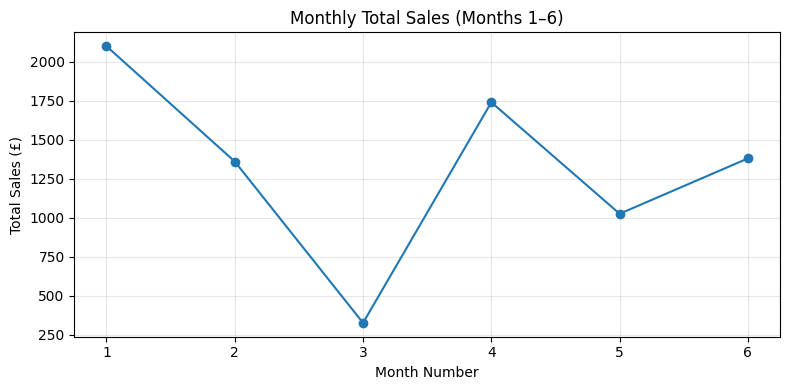

In [91]:
#aggregate and plot
monthly_sales = sales_df.groupby('Month_Extracted')['Total_Amount'].sum().reset_index()

plt.figure(figsize=(8,4))
plt.plot(
    monthly_sales['Month_Extracted'],
    monthly_sales['Total_Amount'],
    marker='o', linestyle='-'
)
plt.xticks(monthly_sales['Month_Extracted'])
plt.title('Monthly Total Sales (Months 1–6)')
plt.xlabel('Month Number')
plt.ylabel('Total Sales (£)')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()



In [92]:
monthly_sales

,Month_Extracted,Total_Amount
0,1,2100.0
1,2,1360.0
2,3,325.0
3,4,1740.0
4,5,1025.0
5,6,1380.0


Top 10 products by revenue

Top 10 Products by Sales:
 Product
Smartphone    3000.0
Laptop        2400.0
Tablet        1500.0
Smartwatch     400.0
Headphones     200.0
Book           180.0
Shoes          150.0
T-Shirt        100.0
Name: Total_Amount, dtype: float64


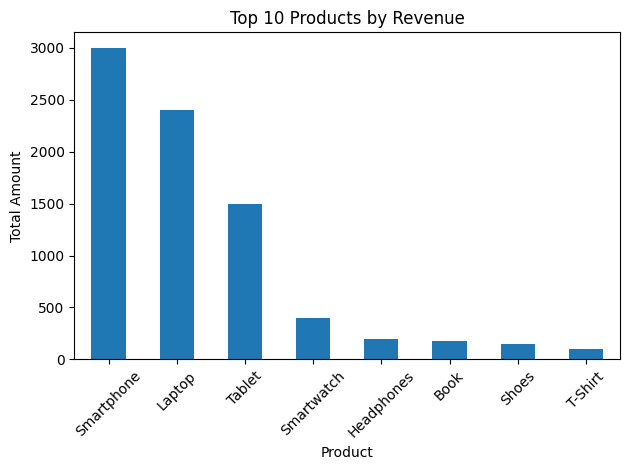

In [94]:
top_products = (
    sales_df
      .groupby('Product')['Total_Amount']
      .sum()
      .sort_values(ascending=False)
      .head(10)
)

print("Top 10 Products by Sales:\n", top_products)

plt.figure()
top_products.plot(kind='bar')
plt.title('Top 10 Products by Revenue')
plt.ylabel('Total Amount')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Sales by category


Sales by Category:
 Category
Books           180.0
Clothing        250.0
Electronics    7500.0
Name: Total_Amount, dtype: float64


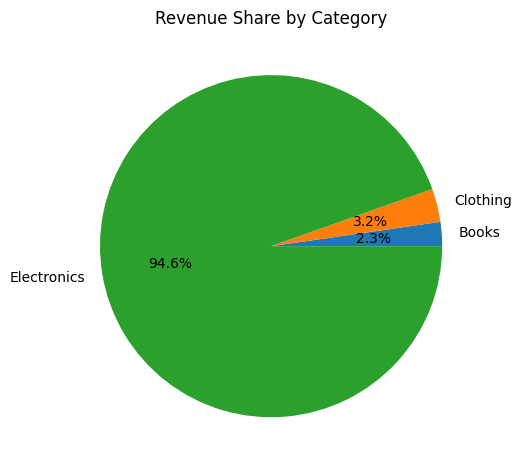

In [95]:
category_sales = sales_df.groupby('Category')['Total_Amount'].sum()
print("\nSales by Category:\n", category_sales)

plt.figure()
category_sales.plot(kind='pie', autopct='%1.1f%%')
plt.title('Revenue Share by Category')
plt.ylabel('')
plt.tight_layout()
plt.show()


Payment method by distribution


Transactions by Payment Method:
 Payment_Method
Credit Card    6
Cash           6
Debit Card     5
Paypal         3
Name: count, dtype: int64


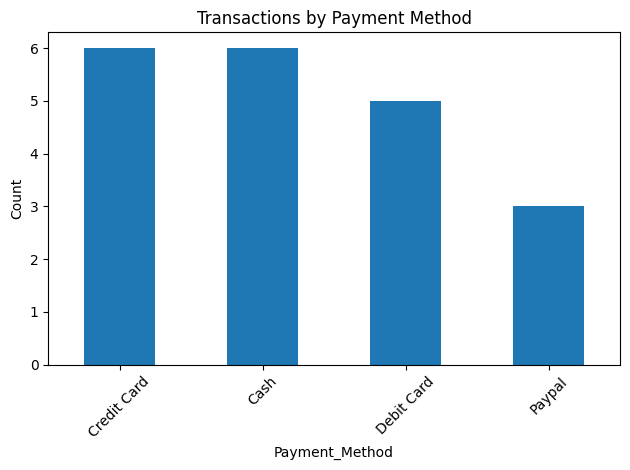

In [96]:
pm_counts = sales_df['Payment_Method'].value_counts()
print("\nTransactions by Payment Method:\n", pm_counts)

plt.figure()
pm_counts.plot(kind='bar')
plt.title('Transactions by Payment Method')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Total sales by region

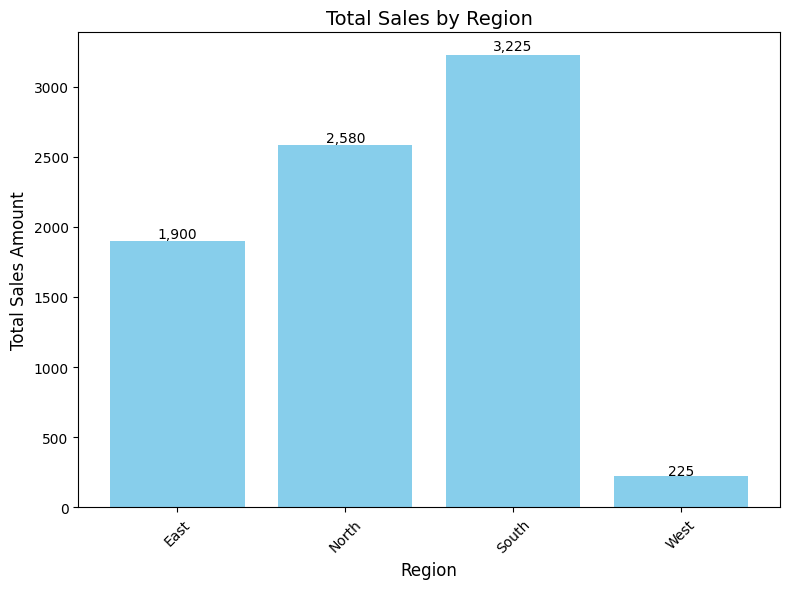

In [105]:
# Compute total sales by region
region_sales = sales_df.groupby('Region')['Total_Amount'].sum()

# Plot
plt.figure(figsize=(8, 6))
bars = plt.bar(region_sales.index, region_sales.values, color='skyblue')
plt.title('Total Sales by Region', fontsize=14)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Total Sales Amount', fontsize=12)
plt.xticks(rotation=45)

# Annotate values
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + height * 0.01,
        f"{height:,.0f}",
        ha='center'
    )

plt.tight_layout()
plt.show()


In [116]:
# Sort monthly sales by Total_Amount in descending order
sorted_monthly_sales = monthly_sales.sort_values(by='Total_Amount', ascending=False)

# Display the sorted DataFrame
print(sorted_monthly_sales)

   Month_Extracted  Total_Amount
0                1        2100.0
3                4        1740.0
5                6        1380.0
1                2        1360.0
4                5        1025.0
2                3         325.0


## Statistical Analysis

Descriptive statistics:
         Quantity       Price  Total_Amount
count  20.000000   20.000000     20.000000
mean    1.550000  325.500000    396.500000
std     0.887041  302.484884    390.418466
min     1.000000   20.000000     25.000000
25%     1.000000   43.750000     78.750000
50%     1.000000  200.000000    200.000000
75%     2.000000  600.000000    650.000000
max     4.000000  800.000000   1200.000000


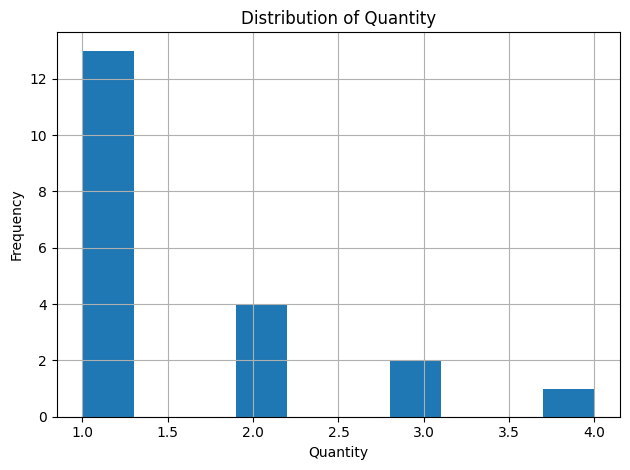

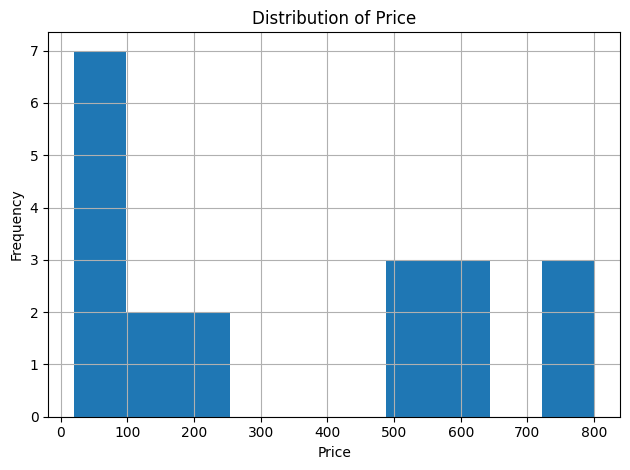

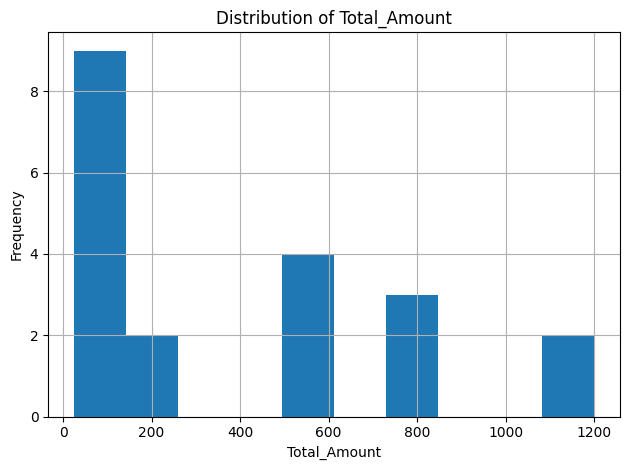

In [98]:

# Summary stats for key numerics
print("Descriptive statistics:\n",
      sales_df[['Quantity','Price','Total_Amount']].describe())

# Histograms to see shape and skew
for col in ['Quantity','Price','Total_Amount']:
    plt.figure()
    sales_df[col].hist()
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()


In [100]:
# Pearson r between Quantity and Total_Amount
r_qt, p_qt = stats.pearsonr(sales_df['Quantity'], sales_df['Total_Amount'])
print(f"Quantity vs Total_Amount: r = {r_qt:.2f}, p = {p_qt:.3g}")

# Pearson r between Price and Total_Amount
r_pt, p_pt = stats.pearsonr(sales_df['Price'], sales_df['Total_Amount'])
print(f"Price vs Total_Amount:    r = {r_pt:.2f}, p = {p_pt:.3g}")


Quantity vs Total_Amount: r = -0.20, p = 0.4
Price vs Total_Amount:    r = 0.89, p = 1.24e-07


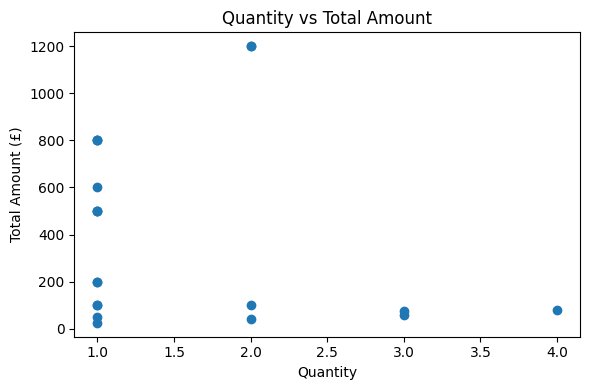

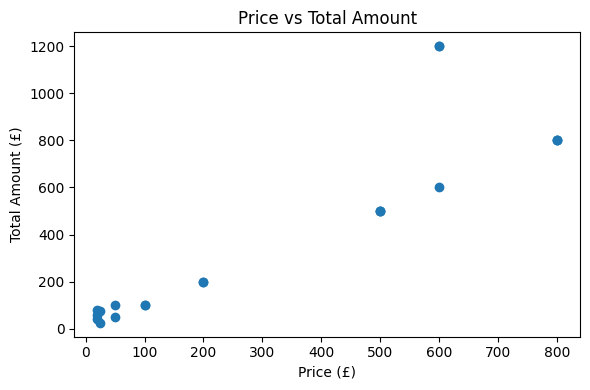

In [101]:
plt.figure(figsize=(6, 4))
plt.scatter(sales_df['Quantity'], sales_df['Total_Amount'])
plt.title('Quantity vs Total Amount')
plt.xlabel('Quantity')
plt.ylabel('Total Amount (£)')
plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 4))
plt.scatter(sales_df['Price'], sales_df['Total_Amount'])
plt.title('Price vs Total Amount')
plt.xlabel('Price (£)')
plt.ylabel('Total Amount (£)')
plt.tight_layout()
plt.show()


In [102]:

# gather Total_Amount for each Category
groups = [grp['Total_Amount'].values 
          for _, grp in sales_df.groupby('Category')]

f_stat, p_val = stats.f_oneway(*groups)
print(f"ANOVA Total_Amount by Category: F = {f_stat:.2f}, p = {p_val:.3g}")


ANOVA Total_Amount by Category: F = 6.09, p = 0.0101


In [103]:

# contingency table
ct = pd.crosstab(sales_df['Category'], sales_df['Payment_Method'])

chi2, p, dof, expected = stats.chi2_contingency(ct)
print(f"Chi² test (Category×Payment_Method): χ² = {chi2:.2f}, p = {p:.3g}, dof = {dof}")

print("\nObserved counts:\n", ct)
print("\nExpected counts:\n", pd.DataFrame(expected, 
                                       index=ct.index, 
                                       columns=ct.columns))


Chi² test (Category×Payment_Method): χ² = 13.53, p = 0.0354, dof = 6

Observed counts:
 Payment_Method  Cash  Credit Card  Debit Card  Paypal
Category                                             
Books              0            3           0       0
Clothing           3            0           0       1
Electronics        3            3           5       2

Expected counts:
 Payment_Method  Cash  Credit Card  Debit Card  Paypal
Category                                             
Books            0.9          0.9        0.75    0.45
Clothing         1.2          1.2        1.00    0.60
Electronics      3.9          3.9        3.25    1.95


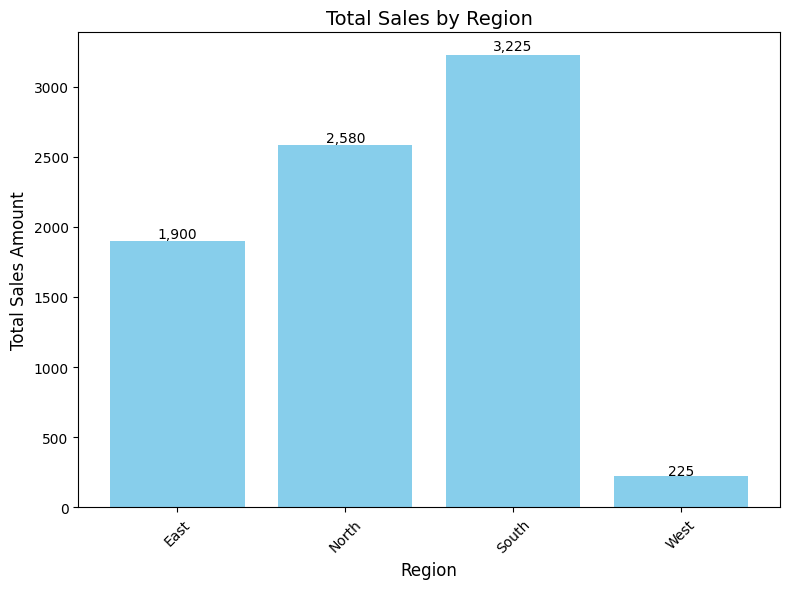

sales region heatmap

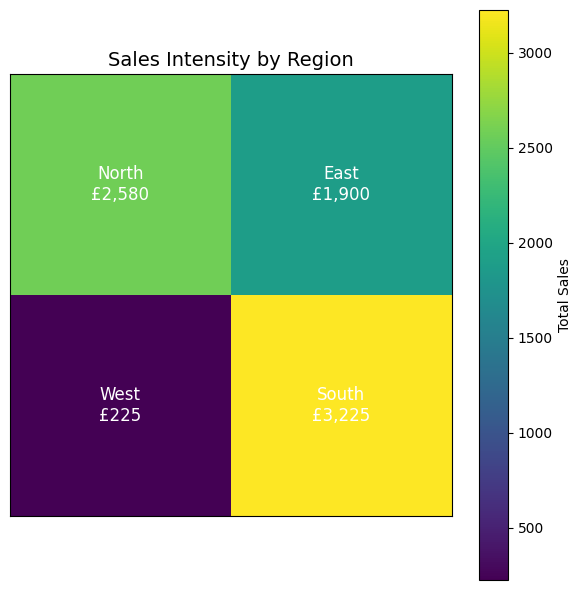

In [106]:
# 1. Aggregate total sales by the four regions
region_sales = sales_df.groupby('Region')['Total_Amount'].sum()

# 2. Define the 2×2 layout: 
#      [ North |  East ]
#      [ West  |  South ]
regions = [
    ['North', 'East'],
    ['West',  'South']
]

# 3. Build a matrix of sales values matching that layout
matrix = np.array([[region_sales.get(r, 0) for r in row] for row in regions])

# 4. Plot the “hotspot” heatmap
fig, ax = plt.subplots(figsize=(6, 6))
cax = ax.imshow(matrix, aspect='equal')

# 5. Annotate each cell
for i, row in enumerate(regions):
    for j, region in enumerate(row):
        ax.text(
            j, i,
            f"{region}\n£{matrix[i, j]:,.0f}",
            ha='center', va='center',
            fontsize=12, color='white'
        )

# 6. Tidy up
ax.set_xticks([])
ax.set_yticks([])
ax.set_title('Sales Intensity by Region', fontsize=14)
fig.colorbar(cax, ax=ax, orientation='vertical', label='Total Sales')

plt.tight_layout()
plt.show()

we can see that the south area has most sales and west 225. Spreading the word to west region might boost sales there.

In [107]:
# Group by Product and Region to see where each product is sold
product_region = sales_df.groupby(['Product', 'Region']).size().unstack(fill_value=0)

print(product_region)

Region      East  North  South  West
Product                             
Book           0      3      0     0
Headphones     0      0      0     2
Laptop         0      3      0     0
Shoes          0      0      2     0
Smartphone     0      0      3     0
Smartwatch     2      0      0     0
T-Shirt        0      0      1     1
Tablet         3      0      0     0


In [108]:
# Pivot: rows=Product, cols=Region, values=Total_Amount (sum)
product_region = sales_df.pivot_table(
    index='Product',
    columns='Region',
    values='Total_Amount',
    aggfunc='sum',
    fill_value=0
)

# View the table
print(product_region)


Region        East   North   South   West
Product                                  
Book           0.0   180.0     0.0    0.0
Headphones     0.0     0.0     0.0  200.0
Laptop         0.0  2400.0     0.0    0.0
Shoes          0.0     0.0   150.0    0.0
Smartphone     0.0     0.0  3000.0    0.0
Smartwatch   400.0     0.0     0.0    0.0
T-Shirt        0.0     0.0    75.0   25.0
Tablet      1500.0     0.0     0.0    0.0


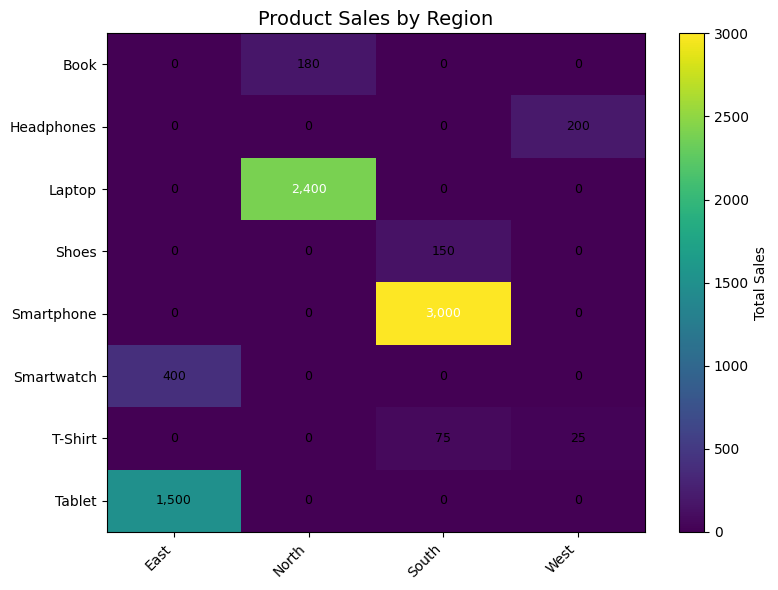

In [109]:
# Convert to numpy matrix
matrix = product_region.values

fig, ax = plt.subplots(figsize=(8, 6))
cax = ax.imshow(matrix, aspect='auto')

# Set ticks
ax.set_xticks(np.arange(len(product_region.columns)))
ax.set_yticks(np.arange(len(product_region.index)))
ax.set_xticklabels(product_region.columns)
ax.set_yticklabels(product_region.index)

# Rotate x-labels
plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

# Annotate each cell with the sales value
for i in range(matrix.shape[0]):
    for j in range(matrix.shape[1]):
        ax.text(
            j, i,
            f"{matrix[i, j]:,.0f}",
            ha='center', va='center',
            fontsize=9, color='white' if matrix[i,j]>matrix.max()/2 else 'black'
        )

ax.set_title('Product Sales by Region', fontsize=14)
fig.colorbar(cax, ax=ax, orientation='vertical', label='Total Sales')

plt.tight_layout()
plt.show()


In [110]:
# Group by Product and Region to see where each product is sold
category_region = sales_df.groupby(['Category', 'Region']).size().unstack(fill_value=0)

print(category_region)

Region       East  North  South  West
Category                             
Books           0      3      0     0
Clothing        0      0      3     1
Electronics     5      3      3     2


In [111]:
# Pivot: rows=Category, cols=Region, values=Total_Amount (sum)
category_region = sales_df.pivot_table(
    index='Category',
    columns='Region',
    values='Total_Amount',
    aggfunc='sum',
    fill_value=0
)

# View the table
print(category_region)


Region         East   North   South   West
Category                                  
Books           0.0   180.0     0.0    0.0
Clothing        0.0     0.0   225.0   25.0
Electronics  1900.0  2400.0  3000.0  200.0


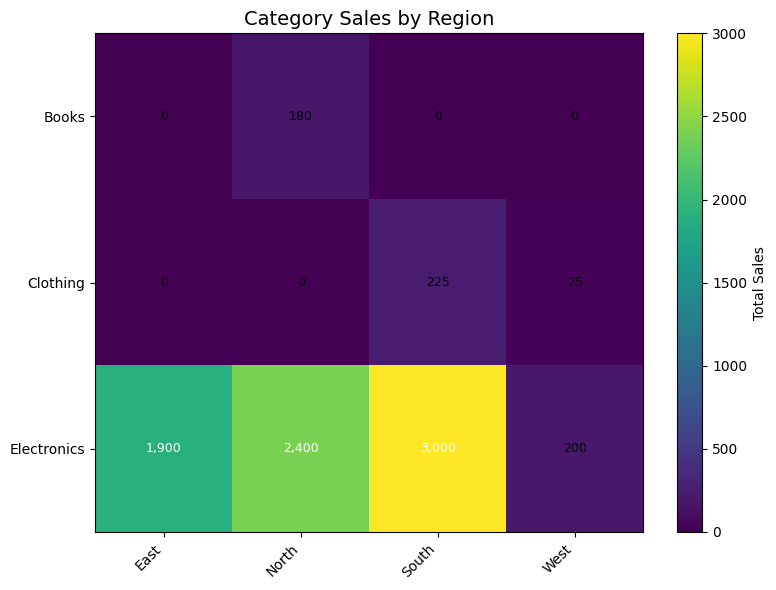

In [112]:
# Convert to numpy matrix
matrix = category_region.values

fig, ax = plt.subplots(figsize=(8, 6))
cax = ax.imshow(matrix, aspect='auto')

# Set ticks
ax.set_xticks(np.arange(len(category_region.columns)))
ax.set_yticks(np.arange(len(category_region.index)))
ax.set_xticklabels(category_region.columns)
ax.set_yticklabels(category_region.index)

# Rotate x-labels
plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

# Annotate each cell with the sales value
for i in range(matrix.shape[0]):
    for j in range(matrix.shape[1]):
        ax.text(
            j, i,
            f"{matrix[i, j]:,.0f}",
            ha='center', va='center',
            fontsize=9, color='white' if matrix[i,j]>matrix.max()/2 else 'black'
        )

ax.set_title('Category Sales by Region', fontsize=14)
fig.colorbar(cax, ax=ax, orientation='vertical', label='Total Sales')

plt.tight_layout()
plt.show()
